<a href="https://colab.research.google.com/github/devyaniii12/DATASET_CREDIT/blob/main/ML_covidDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics

In [33]:
# Loading the dataset
df = pd.read_csv("/content/application_record.csv")  # Replace with the actual path to your dataset

# Initial exploration
print(df.head())
print(df.info())
print(df.describe())

        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment    -12005.0 

In [34]:
# Handling missing values (if any)
# Selecting only numerical features for median calculation
numeric_features = df.select_dtypes(include=np.number).columns
df[numeric_features] = df[numeric_features].fillna(df[numeric_features].median())


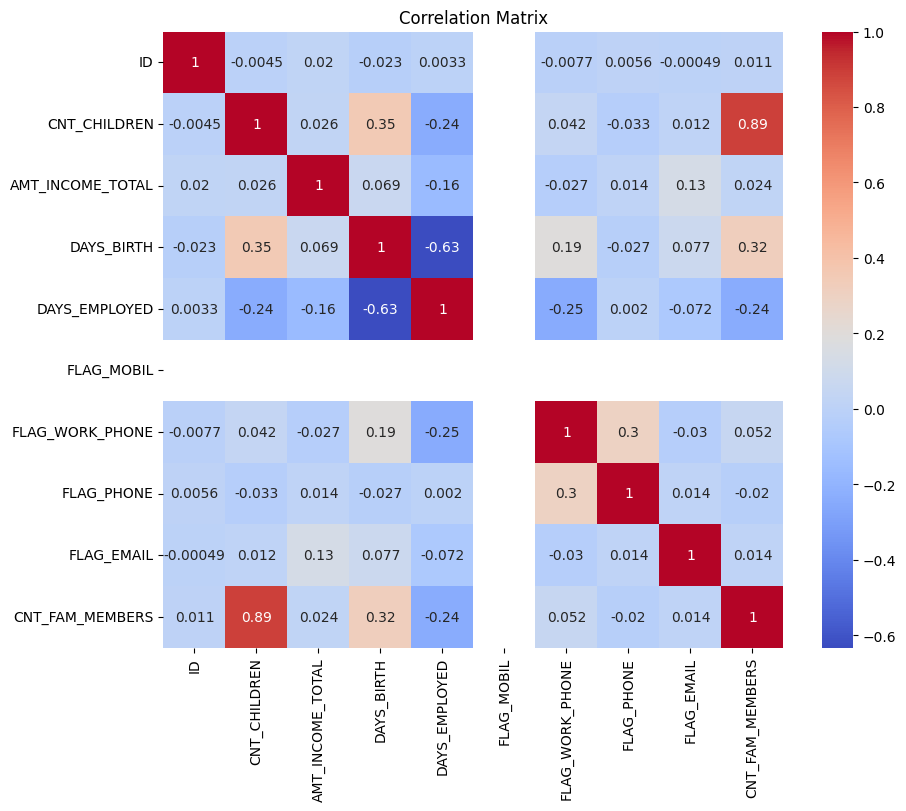

In [35]:
# Checking correlations with heatmap
# Selecting only numerical features for correlation calculation
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm') # Changed line: select only numeric_features for corr()
plt.title("Correlation Matrix")
plt.show()

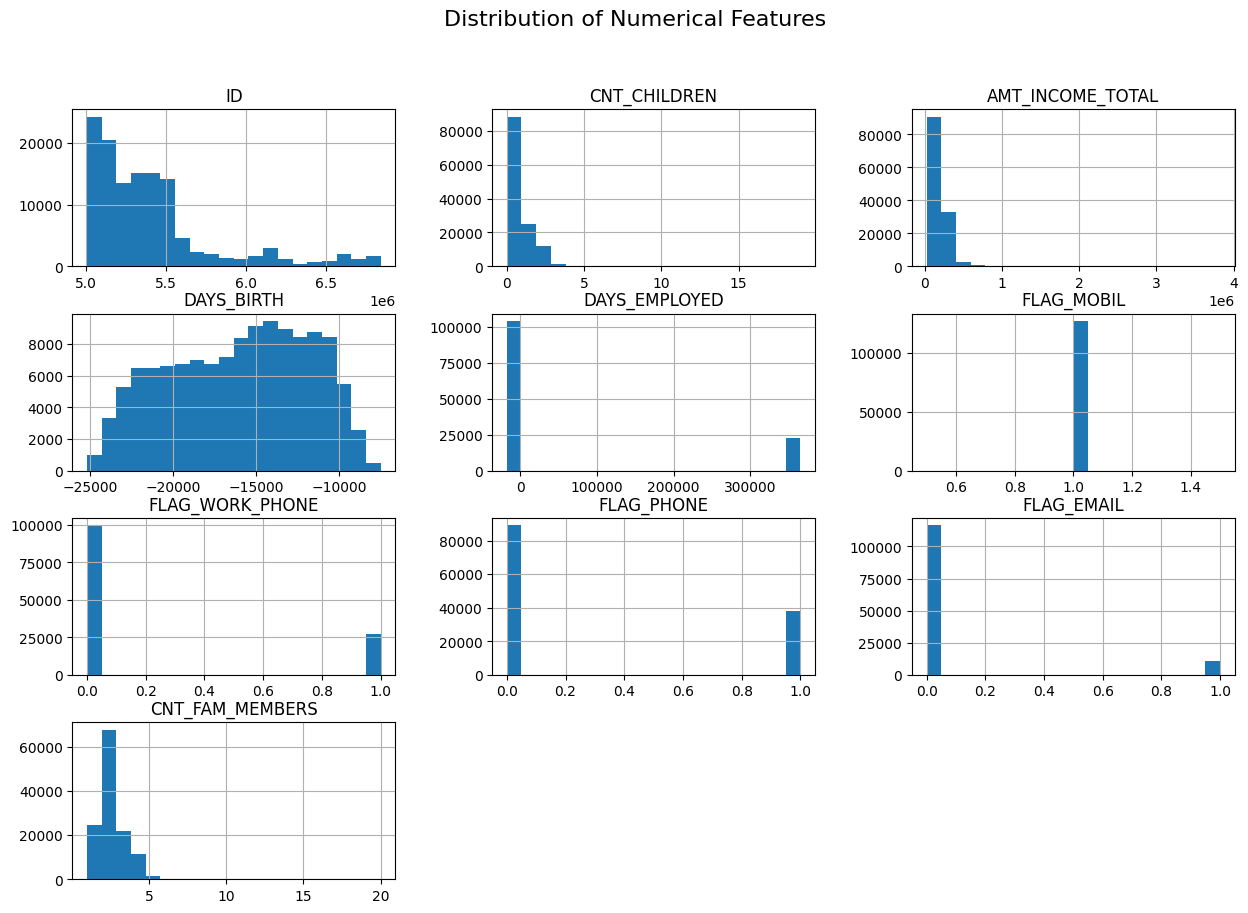

In [36]:
# Visualizing distributions of numerical features
# Replacing infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Filling NaN values with the median (or another appropriate value)
df[numeric_features] = df[numeric_features].fillna(df[numeric_features].median())
# Now create the histograms
df.hist(bins=20, figsize=(15,10))
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()



In [39]:
# Encoding categorical variables (if any)
df = pd.get_dummies(df, drop_first=True)

# Replace  with your actual target variable if different
target_column = 'FLAG_EMAIL'

# Check if the target column is in the DataFrame after get_dummies
if target_column not in df.columns:
    # If not present, assume it was numerical and didn't get encoded
    print(f"Warning: Target column '{target_column}' not found after one-hot encoding. Assuming it's numerical.")
else:
    # Splitting features (X) and target variable (y)
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    # Splitting the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Scaling features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

In [40]:
# Create an instance of your chosen model
model = LinearRegression() # Example: Creating a Linear Regression model

# Now you can fit the model
model.fit(X_train, y_train)

LinearRegression()

In [41]:
# Linear Regression Model Building (for continuous target variables)
if y.dtype != 'object':  # Only use linear regression if target is continuous
    model_lr = LinearRegression().fit(X_train, y_train)
    y_pred_lr = model_lr.predict(X_test)
    print(f"Linear Regression R^2 Score: {model_lr.score(X_test, y_test)}")


Linear Regression R^2 Score: 0.037095029839662064


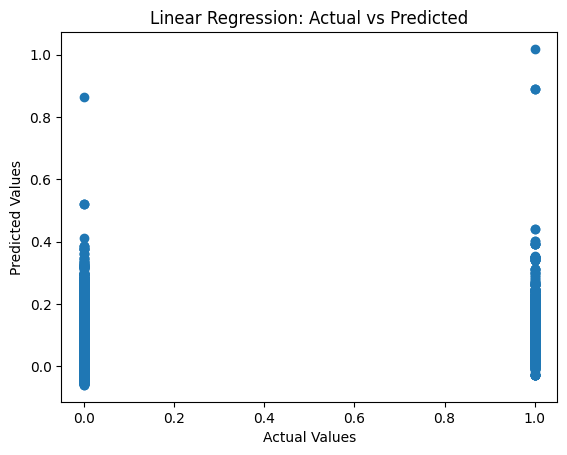

In [42]:
# Plotting predicted vs actual values for Linear Regression
if y.dtype != 'object':  # Only plot if target is continuous
    plt.scatter(y_test, y_pred_lr)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Linear Regression: Actual vs Predicted")
    plt.show()


In [43]:
# Create an instance of your chosen model
model = LogisticRegression() # Example: Creating a Linear Regression model

# Now you can fit the model
model.fit(X_train, y_train)


LogisticRegression()

In [44]:
# Logistic Regression (for binary classification)
model_logr = LogisticRegression(max_iter=1000)
model_logr.fit(X_train, y_train)
y_pred_logr = model_logr.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logr))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.96     34838
         1.0       0.52      0.01      0.01      3274

    accuracy                           0.91     38112
   macro avg       0.72      0.50      0.48     38112
weighted avg       0.88      0.91      0.87     38112



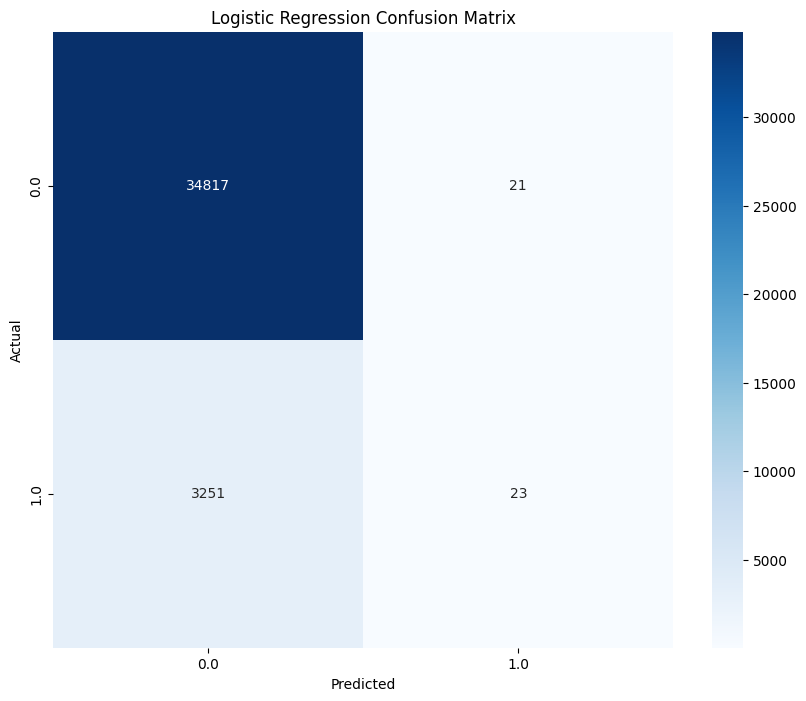

In [45]:
# Confusion Matrix for Logistic Regression
conf_matrix_logr = confusion_matrix(y_test, y_pred_logr)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_logr, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.title("Logistic Regression Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


In [46]:
# Create an instance of your chosen model
model = DecisionTreeClassifier() # Example: Creating a Linear Regression model

# Now you can fit the model
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [47]:
# Decision Tree Classifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     34838
         1.0       0.90      0.91      0.91      3274

    accuracy                           0.98     38112
   macro avg       0.95      0.95      0.95     38112
weighted avg       0.98      0.98      0.98     38112



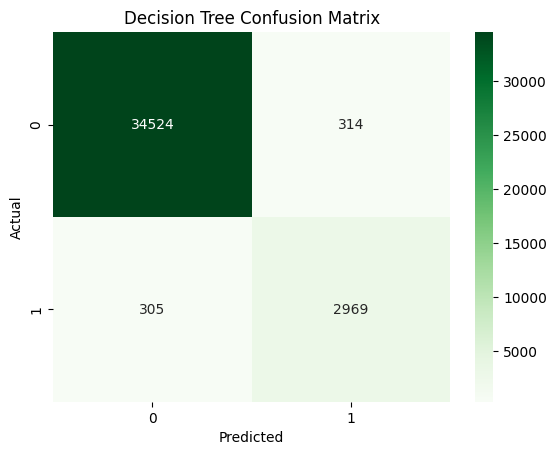

In [48]:
# Confusion Matrix for Decision Tree
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Greens')
plt.title("Decision Tree Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()